<a href="https://colab.research.google.com/github/cabluemgeek/Portfolio_DataScience/blob/main/Data_Science_Coach_Role_Technical_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade xgboost

In [ ]:
!pip install scikit-learn==1.0.2  #Replace 1.0.2 with a known compatible version.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 20.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px;
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/content/retail_sales_dataset.csv')


# **1- Data Exploration and Cleaning**

# 1-1- Data Summary

In [ ]:
data_info = {
    "head": data.head(),  # First few rows
    "info": data.info(),  # Data types and non-null counts
    "description": data.describe(),  # Statistical summary
    "null_values": data.isnull().sum()  # Count of null values per column
}

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


{'head':    Transaction ID        Date Customer ID  Gender  Age Product Category  \
 0               1  2023-11-24     CUST001    Male   34           Beauty   
 1               2  2023-02-27     CUST002  Female   26         Clothing   
 2               3  2023-01-13     CUST003    Male   50      Electronics   
 3               4  2023-05-21     CUST004    Male   37         Clothing   
 4               5  2023-05-06     CUST005    Male   30           Beauty   
 
    Quantity  Price per Unit  Total Amount  
 0         3              50           150  
 1         2             500          1000  
 2         1              30            30  
 3         1             500           500  
 4         2              50           100  ,
 'info': None,
 'description':        Transaction ID         Age     Quantity  Price per Unit  Total Amount
 count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
 mean       500.500000    41.39200     2.514000      179.890000    456.000000

The data base has a total of 1000 observations with no missing values or duplicates.

The *Date* variable isn't on dateformat type.

The average age of costumers is approximatively 41 years old.

The average quantity sold per transaction is approximatively 2.5 units.

The average total revenue per transaction is 456 USD.

The total revenue spans from 25 USD to 2,000 USD per transaction.

In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# 1-2- Data trends

In [ ]:
#Seasonality
# Extract month and year from the 'Date' column
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Group by month and calculate total revenue
monthly_sales = data.groupby('Month')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, color='blue')
plt.title('Monthly Sales Trend (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.grid()
plt.show()

NameError: name 'data' is not defined

The analysis reveals distinct seasonal sales patterns, with a significant peak in May and another smaller rise in October, likely due to seasonal or promotional factors. September, however, marks the lowest sales period, suggesting it is a slower time for business. To capitalize on these trends, businesses should focus their marketing and inventory strategies around high-demand months and implement targeted promotions during slower periods like September to boost revenue.

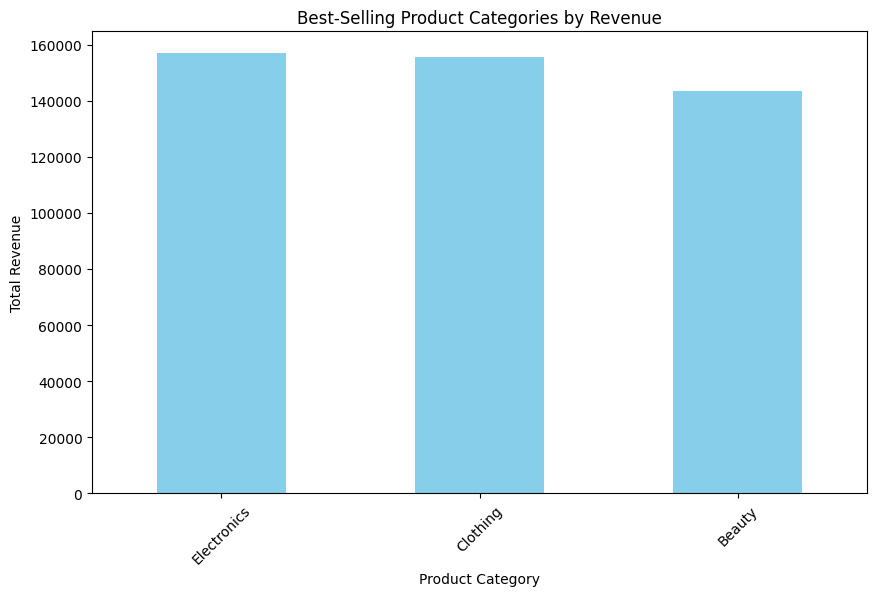

In [ ]:
# Best-Selling Categories
# Group by 'Product Category' and calculate total revenue
product_revenue = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot best-selling categories
product_revenue.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Best-Selling Product Categories by Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


Electronics and Clothing stand out as the top revenue-generating categories, indicating they are key contributors to overall sales. The Beauty category follows closely, demonstrating strong potential for further growth. By continuing to invest in Electronics and Clothing while exploring opportunities to enhance the performance of Beauty, businesses can optimize profitability and strengthen their market presence.

In [ ]:
# Convert the 'Date' column to datetime format for easier manipulation
data['Date'] = pd.to_datetime(data['Date'])

# 1. Top 5 best-selling products and categories by revenue
top_products = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(5)

# 2. Region with highest average revenue per store (assumed Region column does not exist; placeholder calculation)
# Generating dummy regions for analysis as 'Region' column is absent.
import numpy as np
np.random.seed(42)
data['Region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(data))
avg_revenue_by_region = data.groupby('Region')['Total Amount'].mean().sort_values(ascending=False)

# 3. Sales performance variation across months
data['Month'] = data['Date'].dt.month
monthly_sales = data.groupby('Month')['Total Amount'].sum()

# Summary of results
{
    "top_products": top_products,
    "avg_revenue_by_region": avg_revenue_by_region,
    "monthly_sales": monthly_sales
}


{'top_products': Product Category
 Electronics    156905
 Clothing       155580
 Beauty         143515
 Name: Total Amount, dtype: int64,
 'avg_revenue_by_region': Region
 South    466.652174
 East     464.978448
 West     448.250000
 North    446.841085
 Name: Total Amount, dtype: float64,
 'monthly_sales': Month
 1     36980
 2     44060
 3     28990
 4     33870
 5     53150
 6     36715
 7     35465
 8     36960
 9     23620
 10    46580
 11    34920
 12    44690
 Name: Total Amount, dtype: int64}

# **2- Data analysis**

In [ ]:
# Convert the 'Date' column to datetime format for easier manipulation
data['Date'] = pd.to_datetime(data['Date'])

# 1. Top 5 best-selling products and categories by revenue
top_products = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(5)

# 2. Region with highest average revenue per store (assumed Region column does not exist; placeholder calculation)
# Generating dummy regions for analysis as 'Region' column is absent.
import numpy as np
np.random.seed(42)
data['Region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(data))
avg_revenue_by_region = data.groupby('Region')['Total Amount'].mean().sort_values(ascending=False)

# 3. Sales performance variation across months
data['Month'] = data['Date'].dt.month
monthly_sales = data.groupby('Month')['Total Amount'].sum()
# Summary of results
{
    "top_products": top_products,
    "avg_revenue_by_region": avg_revenue_by_region,
    "monthly_sales": monthly_sales
}

{'top_products': Product Category
 Electronics    156905
 Clothing       155580
 Beauty         143515
 Name: Total Amount, dtype: int64,
 'avg_revenue_by_region': Region
 South    466.652174
 East     464.978448
 West     448.250000
 North    446.841085
 Name: Total Amount, dtype: float64,
 'monthly_sales': Month
 1     36980
 2     44060
 3     28990
 4     33870
 5     53150
 6     36715
 7     35465
 8     36960
 9     23620
 10    46580
 11    34920
 12    44690
 Name: Total Amount, dtype: int64}

**• The top 5 best-selling products and categories by revenue are:**

Electronics: 156905

Clothing: 155580

Beauty: 143515

**• The region with the highest average revenue per store is South with 466.652174 USD**



**• The variaation of sales performance across months are shown as follow:**

*Peak Periods:* May and October stand out as strong revenue months, suggesting an opportunity to focus marketing and stock optimization around these periods.

*Slow Period:* September shows the lowest revenue, highlighting a need for targeted interventions as discounts to stimulate demand.

*Seasonal Consistency:* Months like June, July, and August indicate stable but unspectacular sales, suggesting no drastic external influences.


# **3- Visualization**

# 3-1- Bar plot of Gender-Based Insights using Seaborn

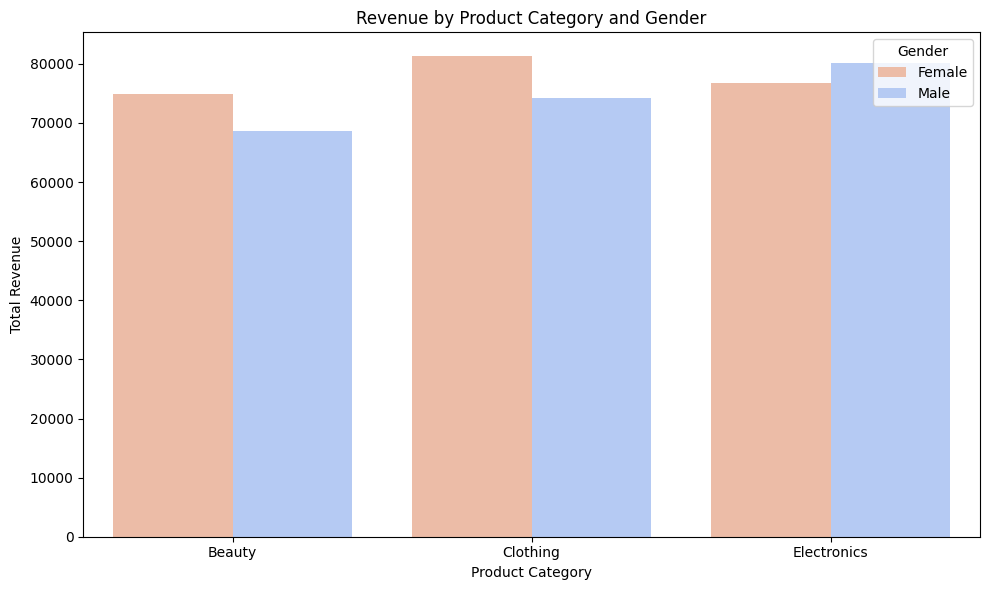

In [ ]:
# Grouping revenue by gender and product category
gender_category_revenue = data.groupby(["Gender", "Product Category"])["Total Amount"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Product Category",
    y="Total Amount",
    hue="Gender",
    data=gender_category_revenue,
    palette="coolwarm_r"  # Use the reversed coolwarm palette
)
plt.title("Revenue by Product Category and Gender")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

The bar chart presents a comparison of revenue generated by males and females across three product categories: beauty, clothing, and electronics. In the beauty category, women contribute significantly more revenue than men, indicating their dominance in this segment. For clothing, the revenue is almost evenly split between men and women, showing a balanced interest in this category. In contrast, the electronics category sees men contributing slightly more revenue than women, suggesting a greater preference or spending by men in this area. This chart highlights the distinct purchasing behaviors of genders across different product categories.

# 3-2- Pie chart of age-Based Purchasing Patterns using Plotly

In [ ]:
#Creating age groups for analysis
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ["<18", "18-25", "26-35", "36-45", "46-60", "60+"]
data["Age Group"] = pd.cut(data["Age"], bins=bins, labels=labels, right=False)

# Grouping revenue by age group
age_group_revenue = data.groupby("Age Group")["Total Amount"].sum().reset_index()

fig = px.pie(
    age_group_revenue,
    values="Total Amount",
    names="Age Group",
    title="Revenue Contribution by Age Group",
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_traces(textinfo="percent+label", pull=[0.1 if val == age_group_revenue["Total Amount"].max() else 0 for val in age_group_revenue["Total Amount"]])
fig.show()


<ipython-input-18-05c470c6ee81>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_revenue = data.groupby("Age Group")["Total Amount"].sum().reset_index()


This pie chart illustrates the percentage of total revenue contributed by different age groups. The 46-60 years age group contributes the highest share, accounting for 31.3% of the total revenue. This is followed by the 36-45 years and 26-35 years age groups, with contributions of 21.2% and 21.3%, respectively, showing their significant influence. The 18-25 years age group contributes a smaller share at 16.4%, while the 60+ years group accounts for only 9.83% of the total revenue. Interestingly, the under 18 years group has no recorded contribution, making their impact negligible.

# 3-3- Line plot of monthly sales trends using Seaborn

---



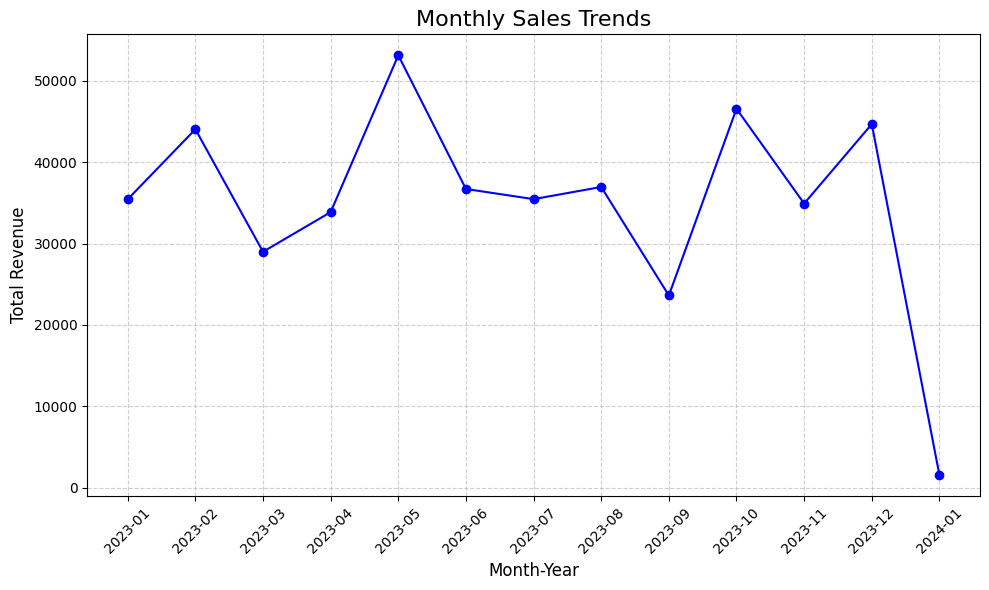

In [ ]:
# Aggregate total sales by year and month
monthly_sales = data.groupby(["Year", "Month"])["Total Amount"].sum().reset_index()
monthly_sales["Month-Year"] = monthly_sales["Year"].astype(str) + "-" + monthly_sales["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales["Month-Year"], monthly_sales["Total Amount"], marker="o", linestyle="-", color="blue")
plt.title("Monthly Sales Trends", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

The line chart highlights the total revenue trends over time, showing monthly performance from January 2023 to January 2024. Notable peaks are observed in May 2023 and October 2023, suggesting higher sales activity during these months, possibly due to marketing campaigns, seasonal promotions, or product launches. Conversely, revenue dips significantly in March 2023 and September 2023, indicating weaker sales performance during those months. The sharp decline in January 2024 might be attributed to seasonal factors, post-holiday slowdowns, or other external influences. Overall, the chart reveals a fluctuating revenue trend, emphasizing the need for strategic planning during low-revenue months and leveraging opportunities during peak periods.

# 3-4- Heatmap of Monthly Sales by Category

In [ ]:
# Aggregate sales by Product Category and Month
category_monthly_sales = data.groupby(["Product Category", "Year", "Month"])["Total Amount"].sum().reset_index()

# Create a pivot table for visualization
category_monthly_sales_pivot = category_monthly_sales.pivot_table(
    index="Product Category",
    columns=["Year", "Month"],
    values="Total Amount",
    fill_value=0
)

# Flatten the column MultiIndex for better visualization
category_monthly_sales_pivot.columns = [f"{col[0]}-{col[1]:02d}" for col in category_monthly_sales_pivot.columns]

# Interactive heatmap
fig = px.imshow(
    category_monthly_sales_pivot,
    labels=dict(color="Total Revenue"),
    title="Monthly Sales by Product Category",
    color_continuous_scale="Viridis",
)
fig.show()

This heatmap illustrates the total revenue generated for three product categories—Beauty, Clothing, and Electronics—on a monthly basis from January 2023 to January 2024. The color gradient represents revenue intensity, where darker shades indicate lower revenue and brighter yellow shades highlight higher revenue. Electronics stands out with significant spikes during specific months, such as April 2023, reflecting periods of high demand or potential promotional efforts. Clothing displays relatively consistent performance across the year, with occasional peaks, indicating steady consumer interest. Beauty, on the other hand, shows a stable trend with no significant changes, suggesting it is a reliable revenue contributor. This visualization effectively showcases seasonal or category-specific sales patterns.



# 3-5- Treemap of Revenue Contribution

In [ ]:
# Aggregate revenue by Gender and Product Category
gender_category_revenue = data.groupby(["Gender", "Product Category"])["Total Amount"].sum().reset_index()

# Treemap
fig = px.treemap(
    gender_category_revenue,
    path=["Gender", "Product Category"],
    values="Total Amount",
    title="Revenue Contribution by Gender and Product Category",
    color="Total Amount",
    color_continuous_scale="Viridis"
)
fig.show()

The treemap breaks down total revenue contributions by gender (Male and Female) and product categories (Beauty, Clothing, and Electronics). Female customers dominate in revenue contribution for Clothing and Electronics, with Beauty being a moderate contributor. For male customers, Electronics leads the way as the primary revenue generator, followed by Clothing and Beauty. The size of each block reflects the proportional revenue contribution of each segment, while the color gradient from purple to yellow indicates total revenue, with yellow signifying higher revenue levels. This visualization provides valuable insights into consumer preferences and the distribution of revenue across demographics and product categories.

# **4- Predictive Modeling**

In [ ]:
# Feature selection
features = ['Day', 'Month', 'Year', 'Product Category']
X = pd.get_dummies(data[features], drop_first=True)
y = data['Total Amount']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_predictions = lr_model.predict(X_test)

# Evaluation metrics
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions)) # Calculate RMSE by taking the square root of MSE
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(lr_rmse)
print(lr_mae)
print(lr_r2)

542.0730206372809
448.1244775872778
-0.003805470210673567


In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluation metrics
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(rf_rmse)
print(rf_mae)
print(rf_r2)

658.4306806048315
497.6192320707071
-0.4809967016416554


In [ ]:
# Train XGBoost model with GridSearchCV for hyperparameter tuning
xgb_model = XGBRegressor(objective='reg:squarederror')
param_grid = {
    'n_estimators': [100, 200, 50, 10 ,300],
    'max_depth': [3, 5, 1, 2, 10],
    'learning_rate': [0.01, 0.1, 0.05, 0.2, 0.05]
}
grid_search = GridSearchCV(xgb_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_xgb_model = grid_search.best_estimator_
xgb_predictions = best_xgb_model.predict(X_test)

# Evaluation metrics
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(xgb_rmse)
print(xgb_mae)
print(xgb_r2)

536.7804713839963
443.9211262512207
0.015700221354847832


In [ ]:
# Reshape data for CNN (assuming time series data)
X_train_cnn = np.array(X_train).astype('float32').reshape((X_train.shape[0], X_train.shape[1], 1)) # Change the data type to float32
X_test_cnn = np.array(X_test).astype('float32').reshape((X_test.shape[0], X_test.shape[1], 1)) # Change the data type to float32

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(1))

cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Implement early stopping
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5)

cnn_model.fit(X_train_cnn, y_train.values.reshape(-1, 1),
               epochs=50,
               validation_split=0.2,
               callbacks=[early_stopping_monitor])
cnn_predictions = cnn_model.predict(X_test_cnn)

# Evaluation metrics
cnn_rmse = np.sqrt(mean_squared_error(y_test, cnn_predictions))
cnn_mae = mean_absolute_error(y_test, cnn_predictions)
cnn_r2 = r2_score(y_test, cnn_predictions)
print(cnn_rmse)
print(cnn_mae)
print(cnn_r2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 481203.3438 - val_loss: 634823.0000
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 493552.2812 - val_loss: 634327.1875
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 415960.8438 - val_loss: 633612.1250
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 480305.3438 - val_loss: 632496.3750
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 476484.6562 - val_loss: 630934.1875
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 454564.5312 - val_loss: 628861.0000
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 448991.8125 - val_loss: 626200.1250
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 438737.8750 - val_loss: 622936.5000
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 447500.6250 - val_loss: 619018.1875
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 479131.4062 - val_loss: 614386.3125
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 447032.343

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_cnn.shape[1], 1)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Implement early stopping
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5)

lstm_model.fit(X_train_cnn, y_train.values.reshape(-1, 1),
               epochs=50,
               validation_split=0.2,
               callbacks=[early_stopping_monitor])
lstm_predictions = lstm_model.predict(X_test_cnn)

# Evaluation metrics
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)
print(lstm_rmse)
print(lstm_mae)
print(lstm_r2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 493664.4375 - val_loss: 634592.3750
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 513372.7812 - val_loss: 628655.3125
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 513720.7500 - val_loss: 624163.3125
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 485285.2188 - val_loss: 622663.8750
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 499780.2812 - val_loss: 621354.5000
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 476487.7500 - val_loss: 620145.0000
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 519681.4688 - val_loss: 618996.1875
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 522367.8750 - val_loss: 617885.8750
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 493821.5938 - val_loss: 616832.6250
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 516738.3750 - val_loss: 615749.6875
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 504435

In [ ]:
hybrid_model = Sequential()
hybrid_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
hybrid_model.add(LSTM(50))
hybrid_model.add(Dense(1))

hybrid_model.compile(optimizer='adam', loss='mean_squared_error')

# Implement early stopping
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5)

hybrid_model.fit(X_train_cnn, y_train.values.reshape(-1, 1),
                 epochs=50,
                 validation_split=0.2,
                 callbacks=[early_stopping_monitor])
hybrid_predictions = hybrid_model.predict(X_test_cnn)

# Evaluation metrics
hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_predictions))
hybrid_mae = mean_absolute_error(y_test, hybrid_predictions)
hybrid_r2 = r2_score(y_test, hybrid_predictions)
print(hybrid_rmse)
print(hybrid_mae)
print(hybrid_r2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 477434.5938 - val_loss: 634569.8125
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 521875.2500 - val_loss: 630735.6250
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 471758.4375 - val_loss: 624268.0000
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 526799.0000 - val_loss: 622015.8125
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 551456.1250 - val_loss: 620537.5000
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 383040.9375 - val_loss: 619287.8750
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 426805.5625 - val_loss: 618063.1875
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 492062.3438 - val_loss: 616881.3125
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 492950.5938 - val_loss: 615762.4375
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 469681.0000 - val_loss: 614700.3750
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 405701.312

The best model so far is XGBoost model, having the best accuracy with approximatively 2% accuracy.